In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. reomove or fill missing data

In [287]:
df=pd.read_csv("car_price.csv")

In [288]:
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [289]:
df.shape

(5512, 10)

In [290]:
df.isnull().sum()

Unnamed: 0             0
car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64

In [291]:
df.dropna(inplace=True)  ## to remove missing data (missing data can be 1%-5% of all data) in this braket we can declare a column name

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           5512 non-null   int64 
 1   car_name             5512 non-null   object
 2   car_prices_in_rupee  5512 non-null   object
 3   kms_driven           5512 non-null   object
 4   fuel_type            5512 non-null   object
 5   transmission         5512 non-null   object
 6   ownership            5512 non-null   object
 7   manufacture          5512 non-null   int64 
 8   engine               5512 non-null   object
 9   Seats                5512 non-null   object
dtypes: int64(2), object(8)
memory usage: 430.8+ KB


# seperate the car name

In [293]:
df['car_name'].unique()

array(['Jeep Compass 2.0 Longitude Option BSIV',
       'Renault Duster RXZ Turbo CVT', 'Toyota Camry 2.5 G', ...,
       'Volvo XC 90 D5 Momentum BSIV',
       'Mercedes-Benz E-Class E250 Edition E', 'BMW M Series M4 Coupe'],
      dtype=object)

# - Slicing

In [294]:
x=df['car_name'][0]


In [295]:
x[:x.index(" ")]

'Jeep'

In [296]:
def company_name(x):
    return x[:x.index(" ")]

In [297]:
df['car_company_name']=df['car_name'].apply(company_name)

In [298]:
def car_name(x):
    return x[:x.index(" ")+1]

In [299]:
df['car_Name']=df['car_name'].apply(car_name)

In [300]:
df.drop('car_name',axis=1,inplace=True)
#OR

#df.drop(columns=['car_name'],inplace=True)

In [301]:
df

,Unnamed: 0,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,car_company_name,car_Name
0,0,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats,Jeep,Jeep
1,1,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats,Renault,Renault
2,2,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats,Toyota,Toyota
3,3,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats,Honda,Honda
4,4,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats,Volkswagen,Volkswagen
...,...,...,...,...,...,...,...,...,...,...,...
5507,5507,28.90 Lakh,"45,000 kms",Diesel,Automatic,1st Owner,2018,2995 cc,7 Seats,BMW,BMW
5508,5508,64.90 Lakh,"29,000 kms",Petrol,Automatic,2nd Owner,2015,1968 cc,5 Seats,BMW,BMW
5509,5509,13.75 Lakh,"90,000 kms",Diesel,Automatic,2nd Owner,2013,2755 cc,5 Seats,Jaguar,Jaguar
5510,5510,29.90 Lakh,"79,000 kms",Diesel,Automatic,3rd Owner,2015,2967 cc,6 Seats,BMW,BMW


# Car_prices_in_rupee
## problem== in car price = 35,000, 23.40 lakh ,1.02 crore



In [302]:
df['car_prices_in_rupee']=df['car_prices_in_rupee'].str.replace(","," ")
df.head()

,Unnamed: 0,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,car_company_name,car_Name
0,0,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats,Jeep,Jeep
1,1,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats,Renault,Renault
2,2,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats,Toyota,Toyota
3,3,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats,Honda,Honda
4,4,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats,Volkswagen,Volkswagen


In [303]:
def ruppee_change(x):
    pi=x.split(" ") ## it is used to make list of data because we use index to manipulate the data-  ['28.90' , 'Lakh' ]
    try:
        if pi[1] =='Lakh':
            return str(round(float(pi[0])*10000,1))
    
        elif pi[1] =='crore':
            return str(round(float(pi[0])*1000000,1))
     
    except :
        return x

In [304]:
df['car_prices_in_rupee'].unique()

array(['10.03 Lakh', '12.83 Lakh', '16.40 Lakh', ..., '28.90 Lakh',
       '64.90 Lakh', '31.90 Lakh'], dtype=object)

In [305]:
df['car_prices_in_rupee']=df['car_prices_in_rupee'].apply(ruppee_change)  ## HERE ERROR = LIST OUT OF INDEX SO USE TRY AND EXCEPT

In [306]:
df

,Unnamed: 0,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,car_company_name,car_Name
0,0,100300.0,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats,Jeep,Jeep
1,1,128300.0,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats,Renault,Renault
2,2,164000.0,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats,Toyota,Toyota
3,3,77700.0,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats,Honda,Honda
4,4,51500.0,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats,Volkswagen,Volkswagen
...,...,...,...,...,...,...,...,...,...,...,...
5507,5507,289000.0,"45,000 kms",Diesel,Automatic,1st Owner,2018,2995 cc,7 Seats,BMW,BMW
5508,5508,649000.0,"29,000 kms",Petrol,Automatic,2nd Owner,2015,1968 cc,5 Seats,BMW,BMW
5509,5509,137500.0,"90,000 kms",Diesel,Automatic,2nd Owner,2013,2755 cc,5 Seats,Jaguar,Jaguar
5510,5510,299000.0,"79,000 kms",Diesel,Automatic,3rd Owner,2015,2967 cc,6 Seats,BMW,BMW


In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           5512 non-null   int64 
 1   car_prices_in_rupee  5333 non-null   object
 2   kms_driven           5512 non-null   object
 3   fuel_type            5512 non-null   object
 4   transmission         5512 non-null   object
 5   ownership            5512 non-null   object
 6   manufacture          5512 non-null   int64 
 7   engine               5512 non-null   object
 8   Seats                5512 non-null   object
 9   car_company_name     5512 non-null   object
 10  car_Name             5512 non-null   object
dtypes: int64(2), object(9)
memory usage: 473.8+ KB


# Covert object to float or int

In [308]:
df['car_prices_in_rupee']=df['car_prices_in_rupee'].astype(float)

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           5512 non-null   int64  
 1   car_prices_in_rupee  5333 non-null   float64
 2   kms_driven           5512 non-null   object 
 3   fuel_type            5512 non-null   object 
 4   transmission         5512 non-null   object 
 5   ownership            5512 non-null   object 
 6   manufacture          5512 non-null   int64  
 7   engine               5512 non-null   object 
 8   Seats                5512 non-null   object 
 9   car_company_name     5512 non-null   object 
 10  car_Name             5512 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 473.8+ KB


# kms_driven

In [310]:
df['kms_driven']=df['kms_driven'].str.replace(",","")
df['kms_driven']=df['kms_driven'].str.replace("kms","")

In [311]:
df['kms_driven']=df['kms_driven'].astype('int64')
df['kms_driven']

0       86226
1       13248
2       60343
3       26696
4       69414
        ...  
5507    45000
5508    29000
5509    90000
5510    79000
5511    42000
Name: kms_driven, Length: 5512, dtype: int64

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           5512 non-null   int64  
 1   car_prices_in_rupee  5333 non-null   float64
 2   kms_driven           5512 non-null   int64  
 3   fuel_type            5512 non-null   object 
 4   transmission         5512 non-null   object 
 5   ownership            5512 non-null   object 
 6   manufacture          5512 non-null   int64  
 7   engine               5512 non-null   object 
 8   Seats                5512 non-null   object 
 9   car_company_name     5512 non-null   object 
 10  car_Name             5512 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 473.8+ KB


In [313]:
df.head()

,Unnamed: 0,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,car_company_name,car_Name
0,0,100300.0,86226,Diesel,Manual,1st Owner,2017,1956 cc,5 Seats,Jeep,Jeep
1,1,128300.0,13248,Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats,Renault,Renault
2,2,164000.0,60343,Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats,Toyota,Toyota
3,3,77700.0,26696,Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats,Honda,Honda
4,4,51500.0,69414,Petrol,Manual,1st Owner,2016,1199 cc,5 Seats,Volkswagen,Volkswagen


# Engine

## Remove cc

In [314]:
df['engine']=df['engine'].str.replace("cc","")


In [315]:
df['engine_in_cc']=df['engine'].astype(int)

In [316]:
df.drop('engine',axis=1,inplace=True)

In [317]:
df

,Unnamed: 0,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,Seats,car_company_name,car_Name,engine_in_cc
0,0,100300.0,86226,Diesel,Manual,1st Owner,2017,5 Seats,Jeep,Jeep,1956
1,1,128300.0,13248,Petrol,Automatic,1st Owner,2021,5 Seats,Renault,Renault,1330
2,2,164000.0,60343,Petrol,Automatic,1st Owner,2016,5 Seats,Toyota,Toyota,2494
3,3,77700.0,26696,Petrol,Automatic,1st Owner,2018,5 Seats,Honda,Honda,1199
4,4,51500.0,69414,Petrol,Manual,1st Owner,2016,5 Seats,Volkswagen,Volkswagen,1199
...,...,...,...,...,...,...,...,...,...,...,...
5507,5507,289000.0,45000,Diesel,Automatic,1st Owner,2018,7 Seats,BMW,BMW,2995
5508,5508,649000.0,29000,Petrol,Automatic,2nd Owner,2015,5 Seats,BMW,BMW,1968
5509,5509,137500.0,90000,Diesel,Automatic,2nd Owner,2013,5 Seats,Jaguar,Jaguar,2755
5510,5510,299000.0,79000,Diesel,Automatic,3rd Owner,2015,6 Seats,BMW,BMW,2967


# Seats
## remove Seats

In [318]:
df['Seats']=df['Seats'].str.replace("Seats","")
df['Seats']=df['Seats'].astype(int)

In [319]:
df

,Unnamed: 0,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,Seats,car_company_name,car_Name,engine_in_cc
0,0,100300.0,86226,Diesel,Manual,1st Owner,2017,5,Jeep,Jeep,1956
1,1,128300.0,13248,Petrol,Automatic,1st Owner,2021,5,Renault,Renault,1330
2,2,164000.0,60343,Petrol,Automatic,1st Owner,2016,5,Toyota,Toyota,2494
3,3,77700.0,26696,Petrol,Automatic,1st Owner,2018,5,Honda,Honda,1199
4,4,51500.0,69414,Petrol,Manual,1st Owner,2016,5,Volkswagen,Volkswagen,1199
...,...,...,...,...,...,...,...,...,...,...,...
5507,5507,289000.0,45000,Diesel,Automatic,1st Owner,2018,7,BMW,BMW,2995
5508,5508,649000.0,29000,Petrol,Automatic,2nd Owner,2015,5,BMW,BMW,1968
5509,5509,137500.0,90000,Diesel,Automatic,2nd Owner,2013,5,Jaguar,Jaguar,2755
5510,5510,299000.0,79000,Diesel,Automatic,3rd Owner,2015,6,BMW,BMW,2967


# To convert the date into 
##         january 27 ,2019    to   2019-01-27

In [320]:
#df['manufecture_date']=pd.to_datetime(df['manufecture_data'])


# 2. Data cleaning for ML

In [321]:
from sklearn.preprocessing import LabelEncoder ,StandardScaler
encoder=LabelEncoder()

In [322]:
df.head()

,Unnamed: 0,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,Seats,car_company_name,car_Name,engine_in_cc
0,0,100300.0,86226,Diesel,Manual,1st Owner,2017,5,Jeep,Jeep,1956
1,1,128300.0,13248,Petrol,Automatic,1st Owner,2021,5,Renault,Renault,1330
2,2,164000.0,60343,Petrol,Automatic,1st Owner,2016,5,Toyota,Toyota,2494
3,3,77700.0,26696,Petrol,Automatic,1st Owner,2018,5,Honda,Honda,1199
4,4,51500.0,69414,Petrol,Manual,1st Owner,2016,5,Volkswagen,Volkswagen,1199


# car_Name --> convert into numbers using encoder

In [323]:
df['car_Name']=encoder.fit_transform(df['car_Name'])

In [324]:
df.head()

,Unnamed: 0,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,Seats,car_company_name,car_Name,engine_in_cc
0,0,100300.0,86226,Diesel,Manual,1st Owner,2017,5,Jeep,12,1956
1,1,128300.0,13248,Petrol,Automatic,1st Owner,2021,5,Renault,26,1330
2,2,164000.0,60343,Petrol,Automatic,1st Owner,2016,5,Toyota,29,2494
3,3,77700.0,26696,Petrol,Automatic,1st Owner,2018,5,Honda,8,1199
4,4,51500.0,69414,Petrol,Manual,1st Owner,2016,5,Volkswagen,30,1199


# fuel-type 

In [330]:
df['fuel_type']=encoder.fit_transform(df['fuel_type'])

In [332]:
df['transmission']=encoder.fit_transform(df['transmission'])

In [333]:
df['ownership']=encoder.fit_transform(df['ownership'])


In [334]:
df['car_company_name']=encoder.fit_transform(df['car_company_name'])


In [335]:
df.head()

,Unnamed: 0,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,Seats,car_company_name,car_Name,engine_in_cc,fuel-type
0,0,100300.0,86226,1,1,1,2017,5,12,12,1956,1
1,1,128300.0,13248,4,0,1,2021,5,26,26,1330,4
2,2,164000.0,60343,4,0,1,2016,5,29,29,2494,4
3,3,77700.0,26696,4,0,1,2018,5,8,8,1199,4
4,4,51500.0,69414,4,1,1,2016,5,30,30,1199,4


# df['year']=df['full_date'].dt.year  is used to extract year only

# to find outliers

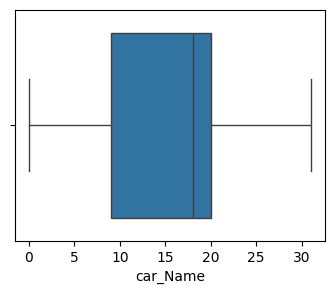

In [283]:
plt.figure(figsize=(4,3))
sns.boxplot(x="car_Name",data=df)
plt.show()


# no outliers

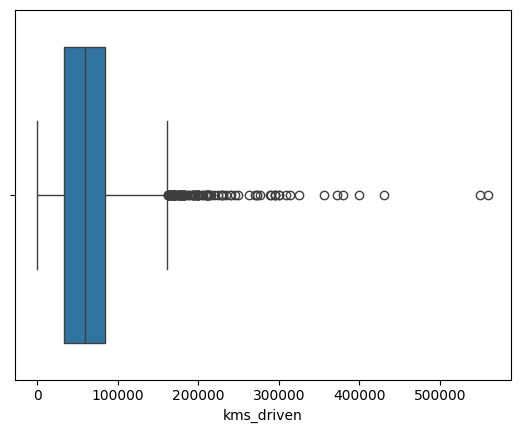

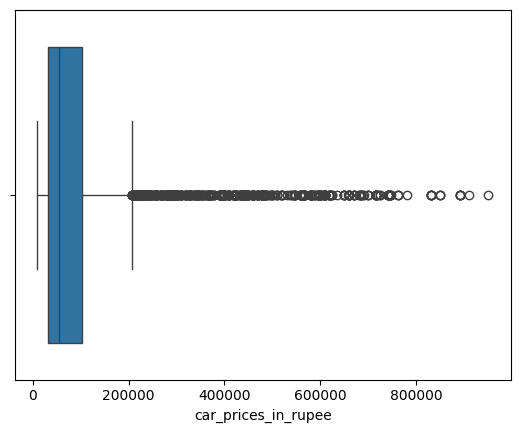

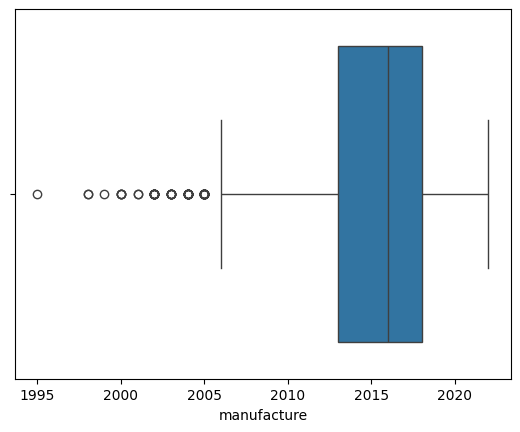

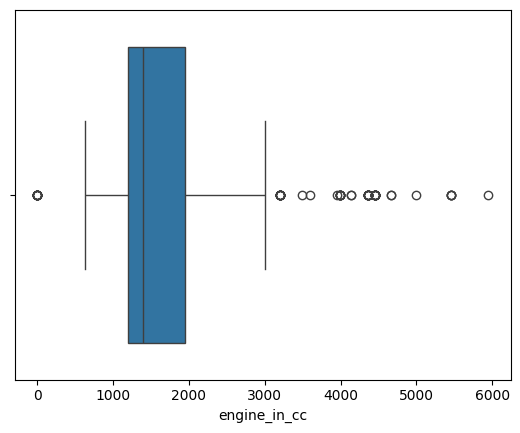

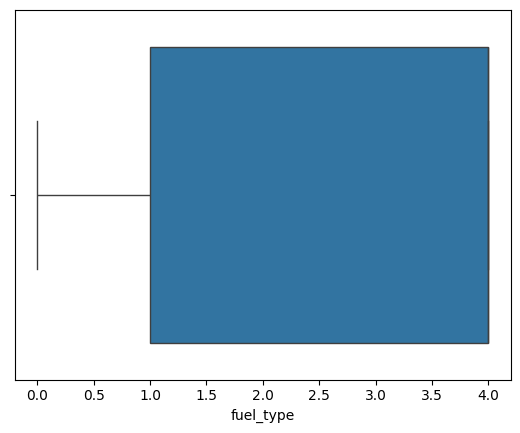

In [337]:
sns.boxplot(x="kms_driven",data=df)
plt.show()
sns.boxplot(x="car_prices_in_rupee",data=df)
plt.show()
sns.boxplot(x="manufacture",data=df)
plt.show()
sns.boxplot(x="engine_in_cc",data=df)
plt.show()
sns.boxplot(x="fuel_type",data=df)
plt.show()


In [338]:
import numpy as np


# Scaling 

In [340]:
q1 = np.quantile(df['engine_in_cc'],0.25)
q3 = np.quantile(df['engine_in_cc'],0.75)
q1,q3

(1197.0, 1950.0)

In [342]:
iqr=q3-q1
iqr


753.0

In [344]:
min_rate=q1-(1.5*iqr)
max_rate=q3+(1.5*iqr)
min_rate,max_rate

(67.5, 3079.5)

In [345]:
df=df[df['engine_in_cc']<=max_rate]

# Scaling -:
## 1.supervised ML-:
### scaling -> input data
### Not scaling -> output data
## 2. unsupervised ML-:
### scaling -> All data

In [346]:
S_scaler=StandardScaler()

In [348]:
#Scaled_df=pd.DataFrame(S_scaler.fit_transform(df))
# or for columns 
Scaled_df=pd.DataFrame(S_scaler.fit_transform(df),columns=df.columns)

Scaled_df

,Unnamed: 0,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,Seats,car_company_name,car_Name,engine_in_cc,fuel-type
0,-1.732986,-0.025047,0.549894,-1.071915,0.621558,-0.599784,0.394400,-0.347118,-0.426950,-0.426950,0.875942,-1.071915
1,-1.732357,0.181120,-1.195849,0.915801,-1.608859,-0.599784,1.412677,-0.347118,1.297643,1.297643,-0.342654,0.915801
2,-1.731728,0.443983,-0.069266,0.915801,-1.608859,-0.599784,0.139831,-0.347118,1.667198,1.667198,1.923235,0.915801
3,-1.731099,-0.191454,-0.874153,0.915801,-1.608859,-0.599784,0.648970,-0.347118,-0.919691,-0.919691,-0.597664,0.915801
4,-1.730470,-0.384367,0.147726,0.915801,0.621558,-0.599784,0.139831,-0.347118,1.790383,1.790383,-0.597664,0.915801
...,...,...,...,...,...,...,...,...,...,...,...,...
5453,1.730751,1.364371,-0.436294,-1.071915,-1.608859,-0.599784,0.648970,2.453431,-1.781987,-1.781987,2.898501,-1.071915
5454,1.731380,4.015090,-0.819038,0.915801,-1.608859,0.821675,-0.114738,-0.347118,-1.781987,-1.781987,0.899302,0.915801
5455,1.732009,0.248860,0.640173,-1.071915,-1.608859,0.821675,-0.623877,-0.347118,-0.550135,-0.550135,2.431307,-1.071915
5456,1.732638,1.438002,0.377037,-1.071915,-1.608859,2.243134,-0.114738,1.053157,-1.781987,-1.781987,2.843995,-1.071915


AttributeError: module 'matplotlib.pyplot' has no attribute 'barplot'